# Imports

In [1]:
pip install inflection

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import math
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime


# load data

In [5]:
df_sales_raw = pd.read_csv('data/rossmann-store-sales/train.csv',low_memory=False)

In [6]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
df_sales_raw.shape

(1017209, 9)

In [8]:
df_store_raw = pd.read_csv('data/rossmann-store-sales/store.csv',low_memory=False)

In [9]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df_store_raw.shape

(1115, 10)

In [11]:
# merge the two datasets
df_raw = pd.merge(df_sales_raw,df_store_raw,how='left',on='Store')

In [12]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
df_raw.shape

(1017209, 18)

In [14]:
# creat a copy of the dataset
df1 = df_raw.copy()

In [15]:
cols_old = df1.columns

In [16]:
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase,cols_old))

In [17]:
cols_new

['store',
 'day_of_week',
 'date',
 'sales',
 'customers',
 'open',
 'promo',
 'state_holiday',
 'school_holiday',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

In [18]:
df1.columns = cols_new

## Data types

In [19]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [20]:
df1['date'] = pd.to_datetime(df1['date'],errors = 'coerce')

# Dados Faltantes

In [21]:
(df1.isnull().sum()/len(df1))*100

store                            0.000000
day_of_week                      0.000000
date                             0.000000
sales                            0.000000
customers                        0.000000
open                             0.000000
promo                            0.000000
state_holiday                    0.000000
school_holiday                   0.000000
store_type                       0.000000
assortment                       0.000000
competition_distance             0.259730
competition_open_since_month    31.787764
competition_open_since_year     31.787764
promo2                           0.000000
promo2_since_week               49.943620
promo2_since_year               49.943620
promo_interval                  49.943620
dtype: float64

In [22]:
# competition_distance
max_dis = lambda x: 200000.0 if math.isnan(x) else (x)
df1['competition_distance'] = df1['competition_distance'].apply(max_dis)

In [23]:
df1['competition_open_since_month']

0           9.0
1          11.0
2          12.0
3           9.0
4           4.0
           ... 
1017204     6.0
1017205     4.0
1017206     NaN
1017207     NaN
1017208     NaN
Name: competition_open_since_month, Length: 1017209, dtype: float64

In [24]:
# competition_open_since_month
comp_open_mon = lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else (x['competition_open_since_month'])
df1['competition_open_since_month'] = df1.apply(comp_open_mon,axis=1)

In [25]:
# competition_open_since_year
comp_open_year = lambda x: x['date'].month if math.isnan(x['competition_open_since_year']) else (x['competition_open_since_year'])
df1['competition_open_since_year'] = df1.apply(comp_open_year,axis=1)

In [26]:
# promo2_since_week
pro_sing_week = lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else (x['promo2_since_week'])
df1['promo2_since_week'] = df1.apply(pro_sing_week,axis=1)

In [27]:
# promo2_since_year
pro_sing_year = lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else (x['promo2_since_year'])
df1['promo2_since_year'] = df1.apply(pro_sing_year,axis=1)

In [28]:
month_map = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov',12:'Dec'}

In [29]:
df1['promo_interval'].fillna(0,inplace=True)
df1['month_map'] = df1['date'].dt.month.replace(month_map)

In [30]:
df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0,axis=1)

# Verificando os tipos de dados

In [31]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [32]:
df1['competition_open_since_month '] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

# Estátistica descritiva

In [33]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [34]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std,min max, range, skew, kurtosis

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

In [35]:
m.columns = ['attibutes','min','max','range','mean','median','std','skew','kurtosis']

In [36]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                     4
store_type                        4
assortment                        3
competition_open_since_year      35
promo2_since_week                52
promo2_since_year                 7
promo_interval                    4
month_map                        12
competition_open_since_month     12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

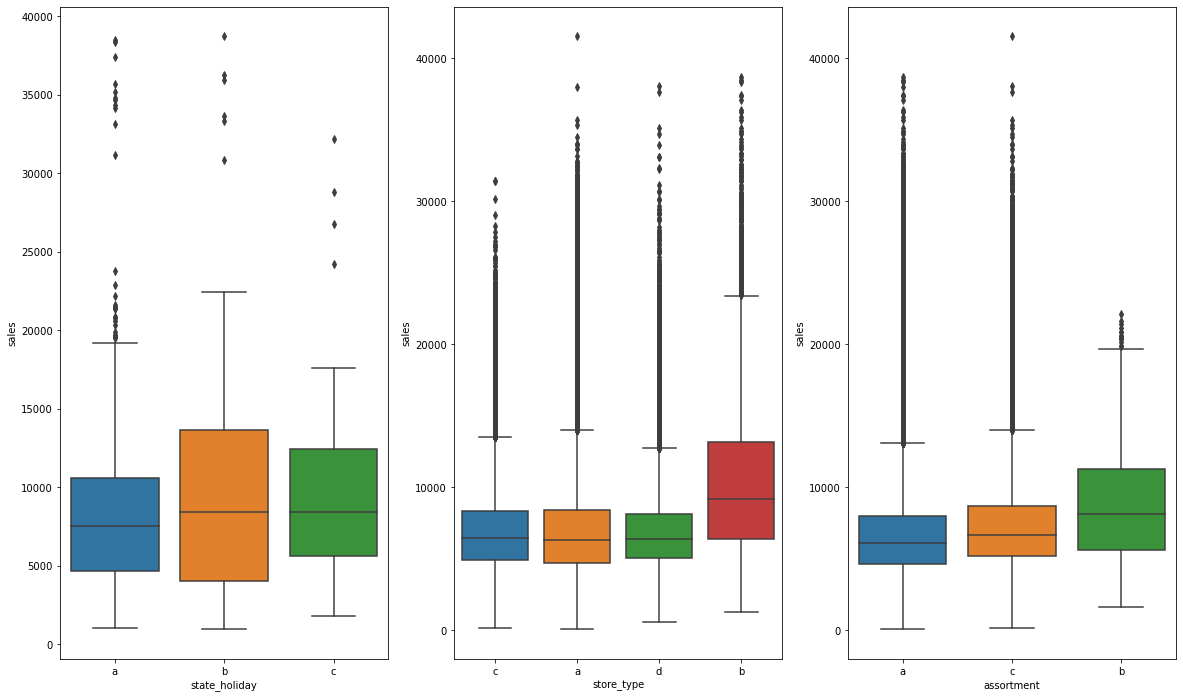

In [37]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
aux1 = df1[(df1['state_holiday']!='0')&(df1['sales']>0)]
sns.boxplot(x='state_holiday',y='sales',data=aux1)
plt.subplot(1,3,2)
aux2 = df1[df1['sales']>0]
sns.boxplot(x='store_type',y='sales',data=aux2)
plt.subplot(1,3,3)
aux3 = df1[df1['sales']>0]
sns.boxplot(x='assortment',y='sales',data=aux3)

# 2.0 Feature engineering

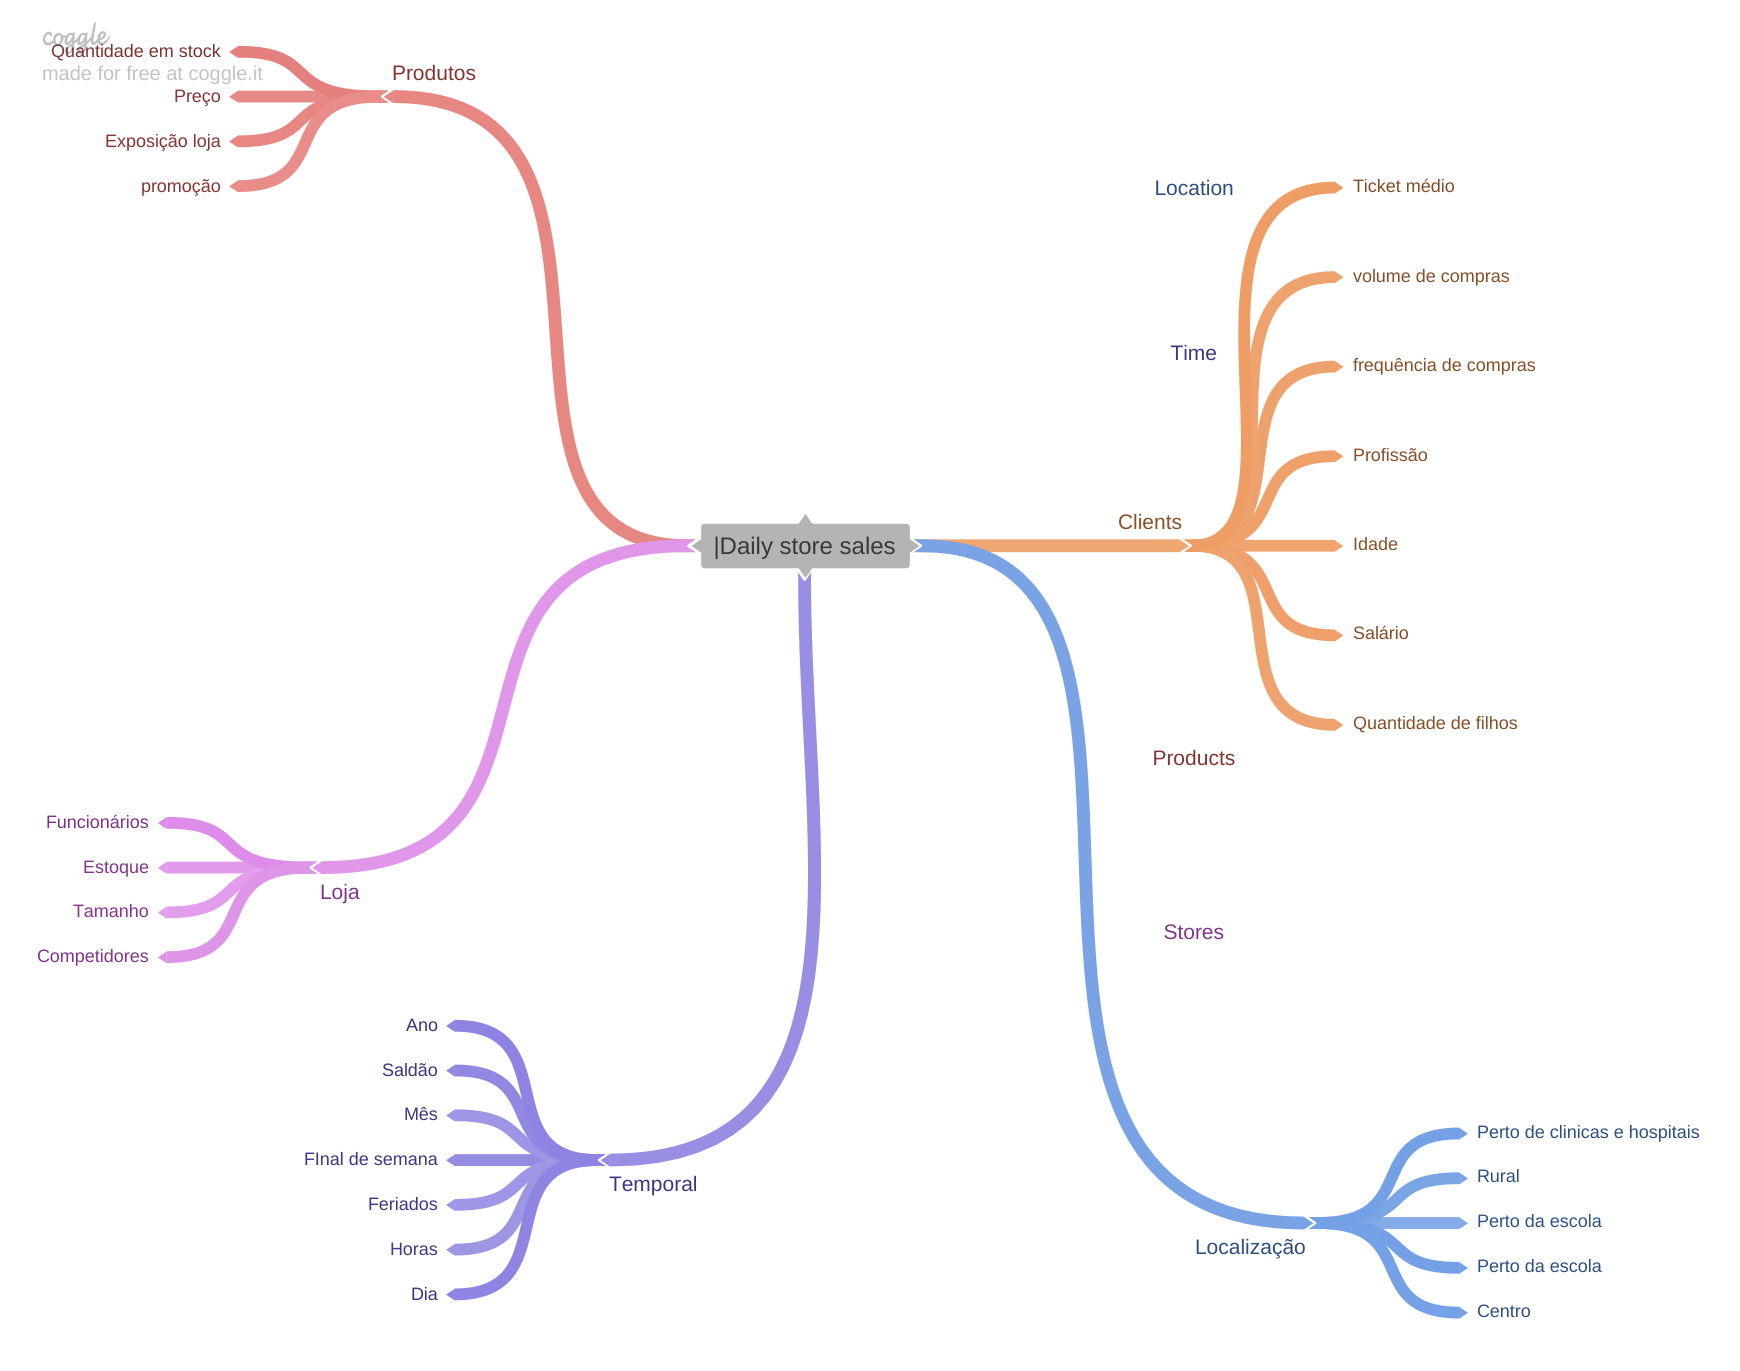

In [47]:
Image('images/Daily_store_sales.png')

## hipotéses

---


1.   Hipoteses de loja


*   Lojas com maior quadro de funcionários vendem mais (x)
*   Lojas com maior estoque vendem mais (x)

* Lojas com maior porte deveriam vender mais
* Lojas com menor porte deveriam vender menos
* lojas com maior sortimento deveriam vender mais

* lojas com competidores mais proximos deveriam vender menos
 * lojas com competidores a mais tempo deveriam vender mais
2.   Hipotéses de produto
* Lojas que que investem mais em marketinh deveriam vender mais (x)
* Lojas que expõem mais os produtos nas vitrines deveriam vender mais (x)

* Lojas que tem preços menores por mais tempo deveriam vender mais (x)

* Lojas que tem preços menores por mais tempo deveriam vender mais (x)

* lojas com promoções consecutivas deveriam vender mais

* com promoções ativas deveriam vender mais
* Lojas com mais dias de promoção deveriam vender mais

3. Hipotéses tempo

* Lojas que tem mais feriados deveriam vender menos

* lojas abertas nos feriados deveriam vender mais

* loja deveriam vender mais ao longos dos anos

* Lojas que abrem nos primeiros 6 meses deveriam vender mais

* lojas deveriam vender mais depois do dia 10 de cada mês

* Lojas que abrem nos finais de semana deveriam vender mais




In [39]:
df2 = df1.copy()

In [40]:
df2['date']

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: date, Length: 1017209, dtype: datetime64[ns]

In [41]:
df2.dtypes

store                                     int64
day_of_week                               int64
date                             datetime64[ns]
sales                                     int64
customers                                 int64
open                                      int64
promo                                     int64
state_holiday                            object
school_holiday                            int64
store_type                               object
assortment                               object
competition_distance                    float64
competition_open_since_month            float64
competition_open_since_year               int32
promo2                                    int64
promo2_since_week                         int32
promo2_since_year                         int32
promo_interval                           object
month_map                                object
is_promo                                  int64
competition_open_since_month            

## Features

In [42]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# year
df2['day'] = df2['date'].dt.day
# year week
df2['week_of_year'] = df2['date'].dt.weekofyear
# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

<ipython-input-42-080f30eca53d>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [48]:
# competition since
df2['competition_open_since_month'] = df2['competition_open_since_month'].astype(int)
comp_since = lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1)
df2['competition_since'] =  df2.apply(comp_since,axis=1)

In [49]:
df2['competition_time_month'] = (((df2['date'] - df2['competition_since'])/30).apply(lambda x:x.days)).astype(int)
# promo since
# assortimentos
# holiday

C:\Users\Lavin\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1342: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 7-07-01 00:00:00

In [ ]:
df2['competition_since']

In [ ]:
df2.head().T